In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [3]:
f = 'https://www.ier.unam.mx/~gbv/DataLab/H2O.csv'
agua = pd.read_csv(f, index_col=0, parse_dates=True, names=["t","consumo"], skiprows=1)
agua

,consumo
t,
2023-05-09 16:00:00,8.972830
2023-05-09 17:00:00,0.000000
2023-05-09 18:00:00,0.000000
2023-05-09 19:00:00,0.000000
2023-05-09 20:00:00,0.000000
...,...
2023-09-11 14:00:00,116.504207
2023-09-11 15:00:00,47.957438
2023-09-11 16:00:00,185.493111


<AxesSubplot:xlabel='t'>

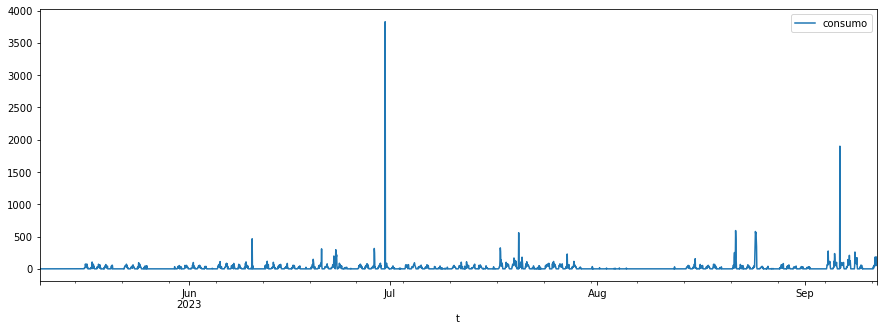

In [5]:
agua.plot(figsize=(15,5))

<AxesSubplot:xlabel='t'>

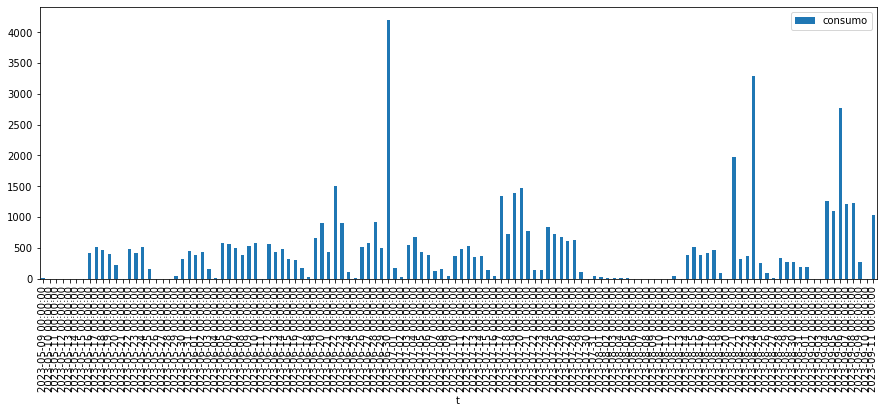

In [6]:
agua.resample("D").sum().plot(figsize=(15,5), kind="bar")

In [7]:
# Asegúrate de que el índice del DataFrame sea de tipo datetime
agua.index = pd.to_datetime(agua.index)

# Calcula el promedio de consumo de la serie temporal
promedio_consumo = agua['consumo'].mean()

# Agrupa los datos por día y calcula el consumo diario promedio
consumo_diario_promedio = agua.resample('D')['consumo'].mean()

# Detecta dónde el consumo diario es mayor al promedio diario
mayor_al_promedio = consumo_diario_promedio[consumo_diario_promedio > promedio_consumo]

print("Promedio de consumo:", promedio_consumo)
print("Días con consumo diario mayor al promedio:")
print(mayor_al_promedio)


Promedio de consumo: 18.435921090090545
Días con consumo diario mayor al promedio:
t
2023-05-17     21.430137
2023-05-18     19.695634
2023-05-22     20.279322
2023-05-24     21.140607
2023-06-05     24.211173
2023-06-06     23.215745
2023-06-07     20.976846
2023-06-09     21.874218
2023-06-10     24.459373
2023-06-12     23.283658
2023-06-14     20.151127
2023-06-19     27.541435
2023-06-20     37.408509
2023-06-22     62.463487
2023-06-23     37.514282
2023-06-26     21.572202
2023-06-27     24.365565
2023-06-28     38.258998
2023-06-29     20.813824
2023-06-30    175.094745
2023-07-03     22.752622
2023-07-04     28.075609
2023-07-11     19.875613
2023-07-12     21.944750
2023-07-17     55.733598
2023-07-18     30.307988
2023-07-19     57.962785
2023-07-20     61.349675
2023-07-21     32.510590
2023-07-24     34.727236
2023-07-25     30.435689
2023-07-26     28.239998
2023-07-27     25.276776
2023-07-28     26.177287
2023-08-15     21.477298
2023-08-18     19.465839
2023-08-21     

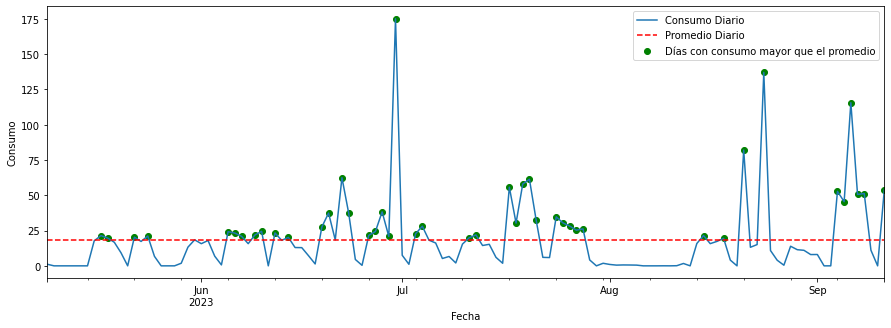

In [11]:
import matplotlib.pyplot as plt

# Traza la serie temporal diaria
agua.resample('D')['consumo'].mean().plot(label='Consumo Diario', figsize=(15,5))

# Traza una línea horizontal en el promedio
plt.axhline(y=promedio_consumo, color='r', linestyle='--', label='Promedio Diario')

# Resalta los puntos donde el consumo diario es mayor que el promedio
plt.scatter(mayor_al_promedio.index, mayor_al_promedio, color='g', label='Días con consumo mayor que el promedio')

plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.show()



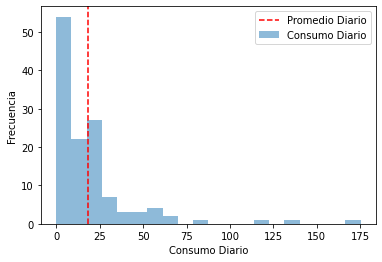

In [12]:
agua['consumo'].resample('D').mean().plot(kind='hist', bins=20, alpha=0.5, label='Consumo Diario')
plt.axvline(x=promedio_consumo, color='r', linestyle='--', label='Promedio Diario')
plt.xlabel('Consumo Diario')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


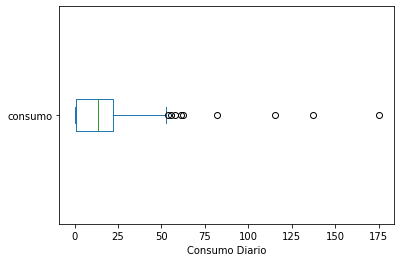

In [13]:
agua['consumo'].resample('D').mean().plot(kind='box', vert=False)
plt.xlabel('Consumo Diario')
plt.show()


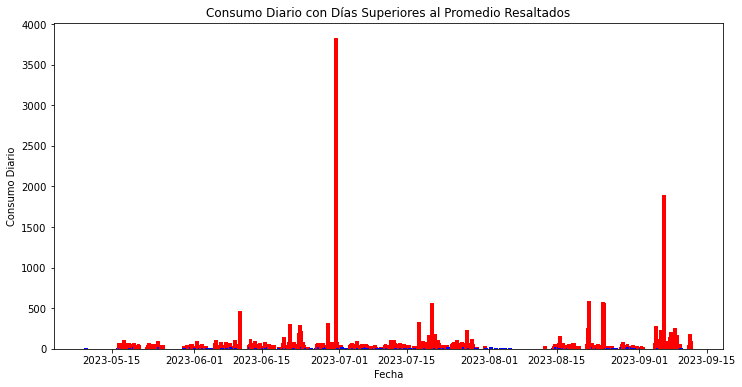

In [15]:
import numpy as np
consumo_diario_promedio = agua.copy()
# Crear una columna que indique si el consumo diario supera el promedio
consumo_diario_promedio['Superior al Promedio'] = consumo_diario_promedio['consumo'] > promedio_consumo

# Graficar el consumo diario con colores diferentes para los días superiores
colors = np.where(consumo_diario_promedio['Superior al Promedio'], 'r', 'b')
plt.figure(figsize=(12, 6))
plt.bar(consumo_diario_promedio.index, consumo_diario_promedio['consumo'], color=colors)
plt.xlabel('Fecha')
plt.ylabel('Consumo Diario')
plt.title('Consumo Diario con Días Superiores al Promedio Resaltados')
plt.show()


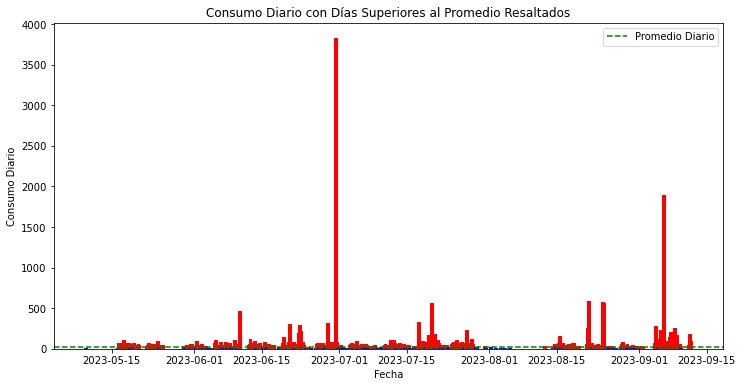

In [16]:

# Crear una columna que indique si el consumo diario supera el promedio
consumo_diario_promedio['Superior al Promedio'] = consumo_diario_promedio['consumo'] > promedio_consumo

# Crear un arreglo de colores para las barras
colors = np.where(consumo_diario_promedio['Superior al Promedio'], 'r', 'b')

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(consumo_diario_promedio.index, consumo_diario_promedio['consumo'], color=colors)
plt.axhline(promedio_consumo, color='g', linestyle='--', label='Promedio Diario')
plt.xlabel('Fecha')
plt.ylabel('Consumo Diario')
plt.title('Consumo Diario con Días Superiores al Promedio Resaltados')
plt.legend()
plt.show()


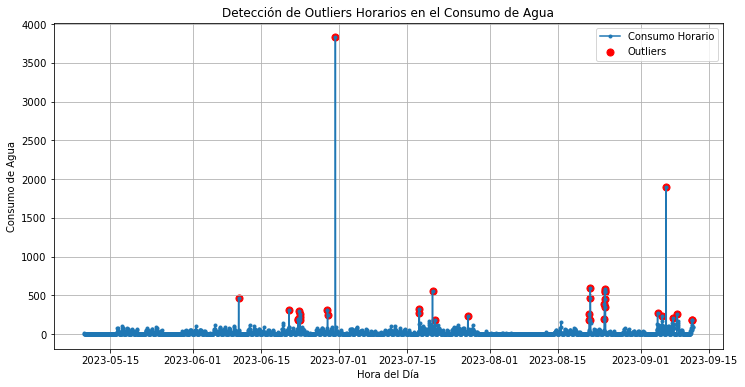

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que tienes un DataFrame llamado 'agua' con un índice datetime y una columna 'consumo'.

# Calcula las desviaciones estándar horarias
desviacion_estandar_horaria = agua['consumo'].std()

# Define un umbral para identificar outliers (por ejemplo, 2 desviaciones estándar)
umbral = 2 * desviacion_estandar_horaria

# Encuentra las horas con outliers
outliers_horarios = agua[agua['consumo'] > umbral]

# Crea un gráfico de puntos para visualizar los outliers
plt.figure(figsize=(12, 6))
plt.plot(agua.index, agua['consumo'], label='Consumo Horario', linestyle='-', marker='o', markersize=3)
plt.scatter(outliers_horarios.index, outliers_horarios['consumo'], color='red', label='Outliers', s=50)
plt.xlabel('Hora del Día')
plt.ylabel('Consumo de Agua')
plt.title('Detección de Outliers Horarios en el Consumo de Agua')
plt.legend()
plt.grid()
plt.show()


<Figure size 864x1728 with 0 Axes>

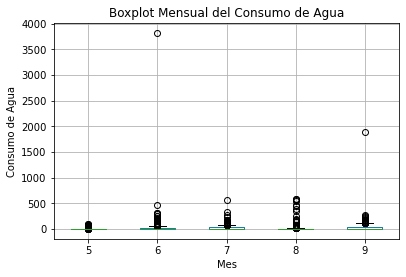

In [20]:
import matplotlib.pyplot as plt

# Agrupa los datos por mes y crea un boxplot
agua['Month'] = agua.index.month
plt.figure(figsize=(12, 24))
agua.boxplot(column='consumo', by='Month')
plt.xlabel('Mes')
plt.ylabel('Consumo de Agua')
plt.title('Boxplot Mensual del Consumo de Agua')
plt.suptitle('')  # Para quitar el título automático generado por Pandas
plt.show()


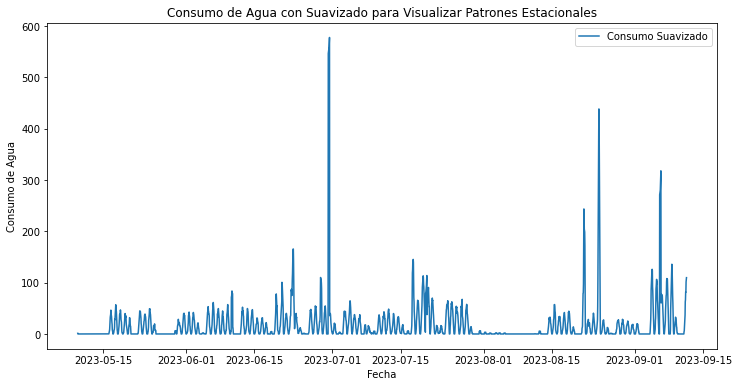

In [21]:
# Aplicar un promedio móvil semanal para suavizar la serie temporal
agua['Consumo Suavizado'] = agua['consumo'].rolling(window=7, center=True).mean()

plt.figure(figsize=(12, 6))
plt.plot(agua.index, agua['Consumo Suavizado'], label='Consumo Suavizado')
plt.xlabel('Fecha')
plt.ylabel('Consumo de Agua')
plt.title('Consumo de Agua con Suavizado para Visualizar Patrones Estacionales')
plt.legend()
plt.show()


<Figure size 864x432 with 0 Axes>

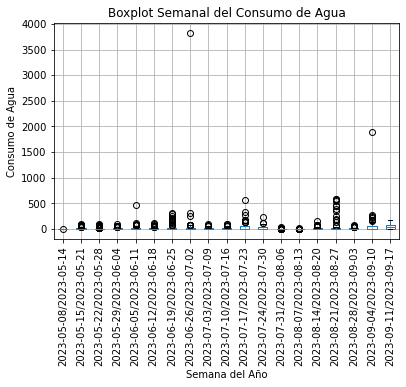

In [22]:
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame 'agua' con un índice datetime y una columna 'consumo'.
# Asegúrate de que el índice sea de tipo datetime.
agua.index = pd.to_datetime(agua.index)

# Agrupa los datos por semana y crea un boxplot semanal
semana_anual = agua.index.to_period('W-SUN')
agua['Week'] = semana_anual
plt.figure(figsize=(12, 6))
agua.boxplot(column='consumo', by='Week')
plt.xlabel('Semana del Año')
plt.ylabel('Consumo de Agua')
plt.title('Boxplot Semanal del Consumo de Agua')
plt.suptitle('')  # Para quitar el título automático generado por Pandas
plt.xticks(rotation=90)
plt.show()


In [24]:
agua

,consumo,Month,Consumo Suavizado,Week
t,,,,
2023-05-09 16:00:00,8.972830,5,NaN,2023-05-08/2023-05-14
2023-05-09 17:00:00,0.000000,5,NaN,2023-05-08/2023-05-14
2023-05-09 18:00:00,0.000000,5,NaN,2023-05-08/2023-05-14
2023-05-09 19:00:00,0.000000,5,1.281833,2023-05-08/2023-05-14
2023-05-09 20:00:00,0.000000,5,0.000000,2023-05-08/2023-05-14
...,...,...,...,...
2023-09-11 14:00:00,116.504207,9,107.192880,2023-09-11/2023-09-17
2023-09-11 15:00:00,47.957438,9,109.776974,2023-09-11/2023-09-17
2023-09-11 16:00:00,185.493111,9,NaN,2023-09-11/2023-09-17


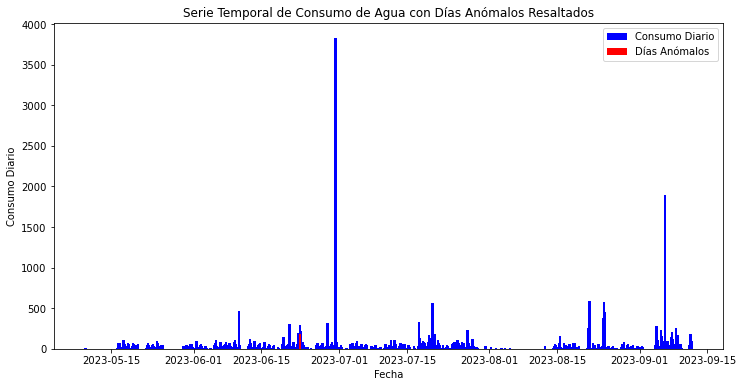

In [23]:
import matplotlib.pyplot as plt

# Supongamos que ya tienes un DataFrame 'agua' con un índice datetime y una columna 'consumo'.

# Calcula el promedio de consumo
promedio_consumo = agua['consumo'].mean()

# Agrupa los datos por día y calcula el consumo diario promedio
consumo_diario_promedio = agua.resample('D')['consumo'].mean()

# Detecta dónde el consumo diario es mayor al promedio diario
dias_anomalos = consumo_diario_promedio[consumo_diario_promedio > promedio_consumo].index

# Crea un gráfico de barras para la serie temporal de consumo de agua
plt.figure(figsize=(12, 6))
plt.bar(agua.index, agua['consumo'], width=0.5, label='Consumo Diario', color='b')

# Resalta los días con datos anómalos
anomalous_days = agua.loc[agua.index.isin(dias_anomalos)]
plt.bar(anomalous_days.index, anomalous_days['consumo'], width=0.5, color='r', label='Días Anómalos')

plt.xlabel('Fecha')
plt.ylabel('Consumo Diario')
plt.title('Serie Temporal de Consumo de Agua con Días Anómalos Resaltados')
plt.legend()
plt.show()


In [25]:
import matplotlib.pyplot as plt

# Supongamos que tienes una Serie temporal de consumo diario llamada 'consumo_diario' con un índice datetime.
# También tienes una lista de días anómalos llamada 'dias_anomalos' que contiene las fechas de los días anómalos.

plt.figure(figsize=(12, 6))

# Graficar la serie temporal de consumo diario
plt.bar(consumo_diario.index, consumo_diario, label='Consumo Diario', color='lightblue')

# Señalar los días anómalos en rojo
plt.bar(dias_anomalos, consumo_diario[dias_anomalos], color='red', label='Días Anómalos')

plt.xlabel('Fecha')
plt.ylabel('Consumo Diario')
plt.title('Serie Temporal de Consumo de Agua con Días Anómalos')
plt.legend()
plt.show()


NameError: name 'consumo_diario' is not defined

<Figure size 864x432 with 0 Axes>

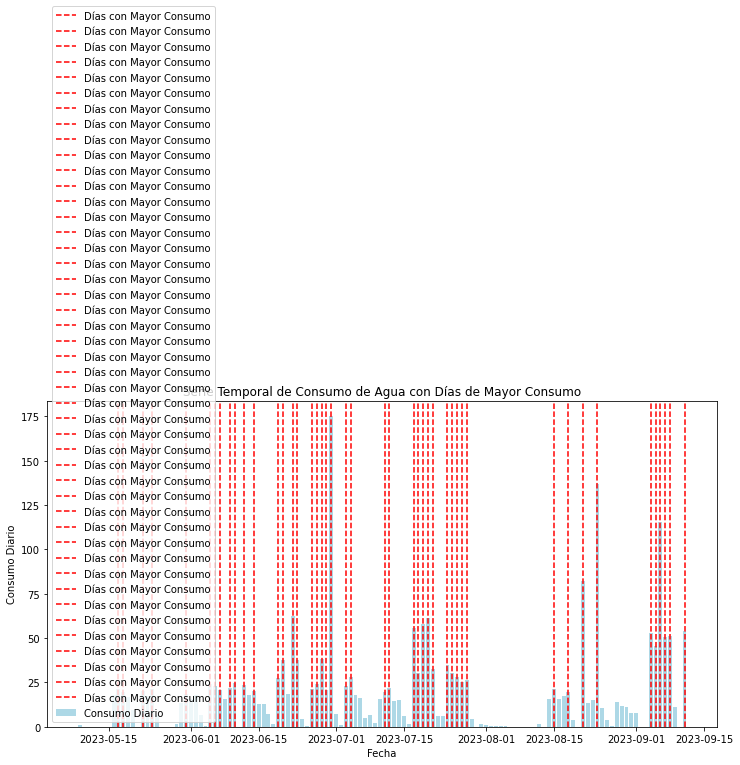

In [27]:
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'agua' con un índice datetime y una columna 'consumo'.

# Calcula el promedio diario de consumo
consumo_diario_promedio = agua.resample('D')['consumo'].mean()

# Encuentra los días con mayor consumo que el promedio
dias_mayor_consumo = consumo_diario_promedio[consumo_diario_promedio > consumo_diario_promedio.mean()]

plt.figure(figsize=(12, 6))

# Graficar la serie temporal de consumo diario
plt.bar(consumo_diario_promedio.index, consumo_diario_promedio, label='Consumo Diario', color='lightblue')

# Señalar los días con mayor consumo en un color diferente
for dia in dias_mayor_consumo.index:
    plt.axvline(x=dia, color='red', linestyle='--', label='Días con Mayor Consumo')

plt.xlabel('Fecha')
plt.ylabel('Consumo Diario')
plt.title('Serie Temporal de Consumo de Agua con Días de Mayor Consumo')
plt.legend()
plt.show()


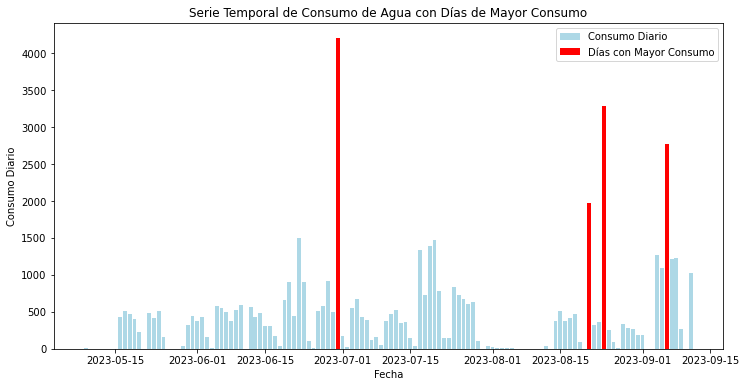

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'agua' con un índice datetime y una columna 'consumo'.
# Asegúrate de que el índice sea de tipo datetime.
agua.index = pd.to_datetime(agua.index)

# Calcula el consumo diario sumando los valores de cada día
consumo_diario = agua['consumo'].resample('D').sum()

# Encuentra los días con mayor consumo (puedes ajustar el umbral según tus criterios)
umbral = consumo_diario.mean() + 2 * consumo_diario.std()
dias_mayor_consumo = consumo_diario[consumo_diario > umbral]

plt.figure(figsize=(12, 6))

# Graficar la serie temporal de consumo diario en forma de barras
plt.bar(consumo_diario.index, consumo_diario, label='Consumo Diario', color='lightblue')

# Señalar los días con mayor consumo en rojo
plt.bar(dias_mayor_consumo.index, dias_mayor_consumo, color='red', label='Días con Mayor Consumo')

plt.xlabel('Fecha')
plt.ylabel('Consumo Diario')
plt.title('Serie Temporal de Consumo de Agua con Días de Mayor Consumo')
plt.legend()
plt.show()


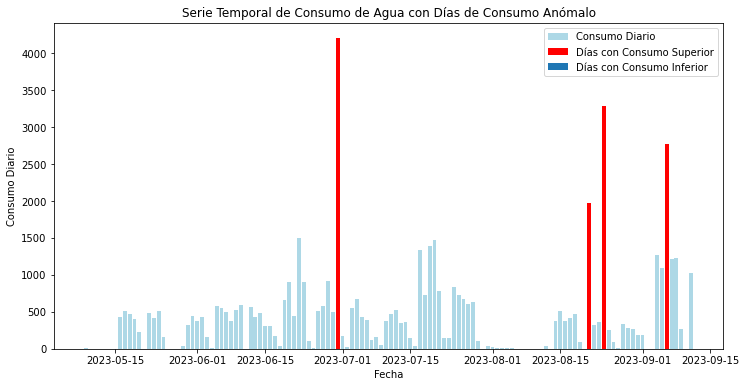

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'agua' con un índice datetime y una columna 'consumo'.
# Asegúrate de que el índice sea de tipo datetime.
agua.index = pd.to_datetime(agua.index)

# Calcula el consumo diario sumando los valores de cada día
consumo_diario = agua['consumo'].resample('D').sum()

# Identifica los días con consumos anómalos (puedes ajustar el umbral según tus criterios)
umbral_superior = consumo_diario.mean() + 2 * consumo_diario.std()  # Umbral para consumos superiores
umbral_inferior = consumo_diario.mean() - 2 * consumo_diario.std()  # Umbral para consumos inferiores
dias_anomalos_superiores = consumo_diario[consumo_diario > umbral_superior]
dias_anomalos_inferiores = consumo_diario[consumo_diario < umbral_inferior]

plt.figure(figsize=(12, 6))

# Graficar la serie temporal de consumo diario en forma de barras
plt.bar(consumo_diario.index, consumo_diario, label='Consumo Diario', color='lightblue')

# Señalar los días con consumos anómalos (superiores en rojo, inferiores en azul)
plt.bar(dias_anomalos_superiores.index, dias_anomalos_superiores, color='red', label='Días con Consumo Superior')
plt.bar(dias_anomalos_inferiores.index, dias_anomalos_inferiores, color='blue', label='Días con Consumo Inferior')

plt.xlabel('Fecha')
plt.ylabel('Consumo Diario')
plt.title('Serie Temporal de Consumo de Agua con Días de Consumo Anómalo')
plt.legend()
plt.show()


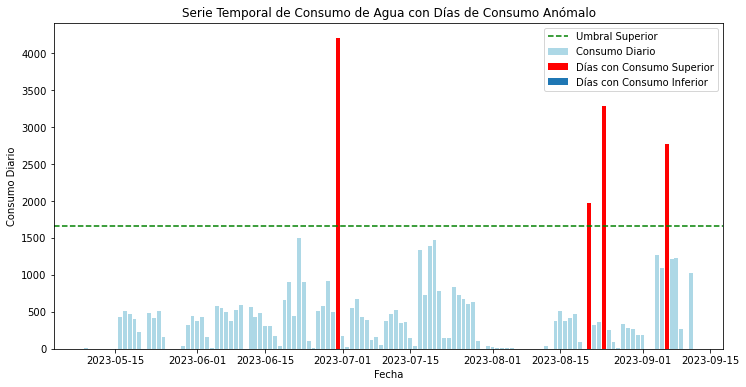

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'agua' con un índice datetime y una columna 'consumo'.
# Asegúrate de que el índice sea de tipo datetime.
agua.index = pd.to_datetime(agua.index)

# Calcula el consumo diario sumando los valores de cada día
consumo_diario = agua['consumo'].resample('D').sum()

# Identifica los días con consumos anómalos (puedes ajustar el umbral según tus criterios)
umbral_superior = consumo_diario.mean() + 2 * consumo_diario.std()  # Umbral para consumos superiores
umbral_inferior = consumo_diario.mean() - 2 * consumo_diario.std()  # Umbral para consumos inferiores
dias_anomalos_superiores = consumo_diario[consumo_diario > umbral_superior]
dias_anomalos_inferiores = consumo_diario[consumo_diario < umbral_inferior]

plt.figure(figsize=(12, 6))

# Graficar la serie temporal de consumo diario en forma de barras
plt.bar(consumo_diario.index, consumo_diario, label='Consumo Diario', color='lightblue')

# Señalar los días con consumos anómalos (superiores en rojo, inferiores en azul)
plt.bar(dias_anomalos_superiores.index, dias_anomalos_superiores, color='red', label='Días con Consumo Superior')
plt.bar(dias_anomalos_inferiores.index, dias_anomalos_inferiores, color='blue', label='Días con Consumo Inferior')

# Agregar una línea horizontal para el umbral superior
plt.axhline(umbral_superior, color='green', linestyle='--', label='Umbral Superior')

plt.xlabel('Fecha')
plt.ylabel('Consumo Diario')
plt.title('Serie Temporal de Consumo de Agua con Días de Consumo Anómalo')
plt.legend()
plt.show()


No handles with labels found to put in legend.


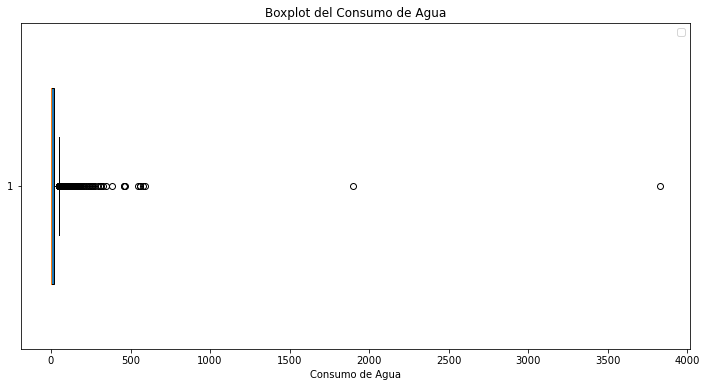

In [32]:
# Supongamos que tienes un DataFrame llamado 'agua' con una columna 'consumo' y un índice datetime.

plt.figure(figsize=(12, 6))

# Crea un boxplot del consumo de agua
plt.boxplot(agua['consumo'], vert=False, widths=0.6, patch_artist=True)
plt.xlabel('Consumo de Agua')
plt.title('Boxplot del Consumo de Agua')

# # Calcula el umbral para identificar outliers
# q1 = agua['consumo'].quantile(0.25)
# q3 = agua['consumo'].quantile(0.75)
# iqr = q3 - q1
# umbral_superior = q3 + 1.5 * iqr
# umbral_inferior = q1 - 1.5 * iqr

# # Identifica y señala los datos anómalos (outliers)
# datos_anomalos = agua[(agua['consumo'] > umbral_superior) | (agua['consumo'] < umbral_inferior)]
# plt.scatter(datos_anomalos['consumo'], [1] * len(datos_anomalos), color='red', marker='x', label='Datos Anómalos')

plt.legend()
plt.show()


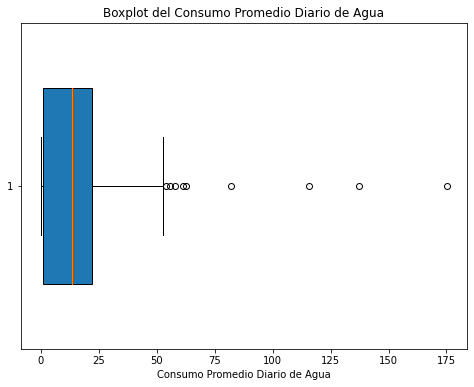

In [33]:
# Supongamos que tienes un DataFrame llamado 'agua' con un índice datetime y una columna 'consumo'.
# Asegúrate de que el índice sea de tipo datetime.
agua.index = pd.to_datetime(agua.index)

# Calcula el consumo promedio diario
consumo_diario_promedio = agua['consumo'].resample('D').mean()

# Crea un boxplot del consumo promedio diario
plt.figure(figsize=(8, 6))
plt.boxplot(consumo_diario_promedio, vert=False, widths=0.6, patch_artist=True)
plt.xlabel('Consumo Promedio Diario de Agua')
plt.title('Boxplot del Consumo Promedio Diario de Agua')

plt.show()

In [34]:
import numpy as np

# Establece un umbral para definir los outliers (ajusta según tus criterios)
umbral = 1.5  # Puedes cambiar este valor si es necesario

# Calcula el rango intercuartil (IQR) de los datos
q1 = np.percentile(consumo_diario_promedio, 25)
q3 = np.percentile(consumo_diario_promedio, 75)
iqr = q3 - q1

# Calcula los límites para definir outliers
umbral_inferior = q1 - (umbral * iqr)
umbral_superior = q3 + (umbral * iqr)

# Encuentra los días con consumos promedio anómalos
outliers_indices = (consumo_diario_promedio < umbral_inferior) | (consumo_diario_promedio > umbral_superior)

# Obtiene las fechas correspondientes a los outliers
fechas_outliers = consumo_diario_promedio.index[outliers_indices]

print("Fechas de los outliers:")
print(fechas_outliers)


Fechas de los outliers:
DatetimeIndex(['2023-06-22', '2023-06-30', '2023-07-17', '2023-07-19',
               '2023-07-20', '2023-08-21', '2023-08-24', '2023-09-06',
               '2023-09-11'],
              dtype='datetime64[ns]', name='t', freq=None)


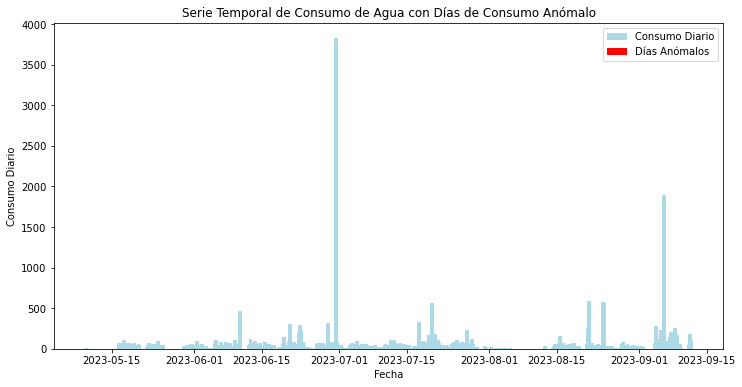

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Supongamos que tienes un DataFrame llamado 'agua' con un índice datetime y una columna 'consumo'.
# También tienes un DataFrame llamado 'consumo_diario_promedio' con el consumo promedio diario y un índice datetime.
# Y una lista de fechas anómalas llamada 'fechas_outliers' que contiene las fechas de los días anómalos.

# Asegúrate de que el índice de 'agua' sea de tipo datetime.
agua.index = pd.to_datetime(agua.index)

plt.figure(figsize=(12, 6))

# Graficar la serie temporal de consumo diario en forma de barras
plt.bar(agua.index, agua['consumo'], label='Consumo Diario', color='lightblue')

# Señalar los días anómalos en rojo
anomalous_consumption = np.zeros(len(agua))  # Inicializar un arreglo con ceros
anomalous_indices = agua.index.isin(fechas_outliers)
anomalous_consumption[anomalous_indices] = agua['consumo'][anomalous_indices]  # Marcador rojo en días anómalos
plt.bar(agua.index, anomalous_consumption, color='red', label='Días Anómalos')

plt.xlabel('Fecha')
plt.ylabel('Consumo Diario')
plt.title('Serie Temporal de Consumo de Agua con Días de Consumo Anómalo')
plt.legend()
plt.show()


In [38]:
agua.loc[fechas_outliers]

,consumo,Month,Consumo Suavizado,Week
t,,,,
2023-06-22,0.0,6,0.000670,2023-06-19/2023-06-25
2023-06-30,0.0,6,0.000000,2023-06-26/2023-07-02
2023-07-17,0.0,7,0.000000,2023-07-17/2023-07-23
2023-07-19,0.0,7,0.102299,2023-07-17/2023-07-23
2023-07-20,0.0,7,23.094697,2023-07-17/2023-07-23
2023-08-21,0.0,8,0.000000,2023-08-21/2023-08-27
2023-08-24,0.0,8,0.000335,2023-08-21/2023-08-27
2023-09-06,0.0,9,0.000000,2023-09-04/2023-09-10
2023-09-11,0.0,9,0.000670,2023-09-11/2023-09-17


In [39]:
import pandas as pd
import numpy as np

# Supongamos que tienes un DataFrame llamado 'agua' con un índice datetime y una columna 'consumo'.
# Asegúrate de que el índice sea de tipo datetime.
agua.index = pd.to_datetime(agua.index)

# Calcula el consumo promedio diario
consumo_diario_promedio = agua['consumo'].resample('D').mean()

# Calcula el rango intercuartil (IQR) de los datos
q1 = np.percentile(consumo_diario_promedio, 25)
q3 = np.percentile(consumo_diario_promedio, 75)
iqr = q3 - q1

# Calcula los límites para definir outliers
umbral_inferior = q1 - 1.5 * iqr
umbral_superior = q3 + 1.5 * iqr

# Encuentra los outliers (valores que están fuera de los límites)
outliers = consumo_diario_promedio[(consumo_diario_promedio < umbral_inferior) | (consumo_diario_promedio > umbral_superior)]

print("Outliers del consumo promedio diario:")
print(outliers)


Outliers del consumo promedio diario:
t
2023-06-22     62.463487
2023-06-30    175.094745
2023-07-17     55.733598
2023-07-19     57.962785
2023-07-20     61.349675
2023-08-21     82.065231
2023-08-24    137.084177
2023-09-06    115.593746
2023-09-11     54.013218
Name: consumo, dtype: float64


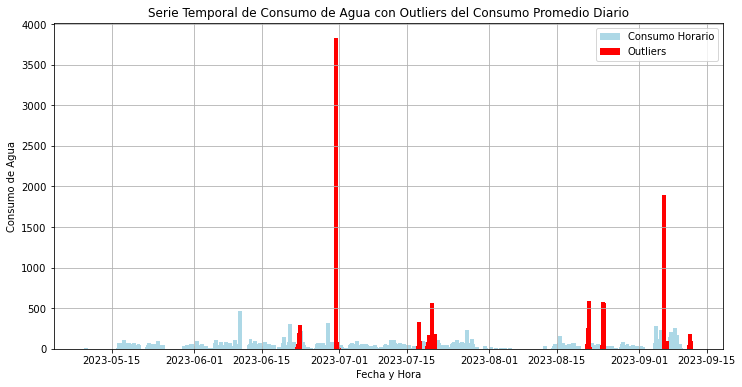

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Supongamos que tienes un DataFrame llamado 'agua' con un índice datetime y una columna 'consumo'.
# Asegúrate de que el índice sea de tipo datetime.
agua.index = pd.to_datetime(agua.index)

# Calcula el consumo promedio diario
consumo_diario_promedio = agua['consumo'].resample('D').mean()

# Calcula el rango intercuartil (IQR) de los datos
q1 = np.percentile(consumo_diario_promedio, 25)
q3 = np.percentile(consumo_diario_promedio, 75)
iqr = q3 - q1

# Calcula los límites para definir outliers
umbral_inferior = q1 - 1.5 * iqr
umbral_superior = q3 + 1.5 * iqr

# Encuentra los outliers (valores que están fuera de los límites)
outliers = consumo_diario_promedio[(consumo_diario_promedio < umbral_inferior) | (consumo_diario_promedio > umbral_superior)]

# Supongamos que tienes un DataFrame llamado 'agua' con valores horarios de consumo.
# Asegúrate de que el índice de 'agua' sea de tipo datetime.

# Crea una gráfica de barras horaria con valores promedio diarios
plt.figure(figsize=(12, 6))

# Graficar la serie temporal de consumo horario en forma de barras
plt.bar(agua.index, agua['consumo'], label='Consumo Horario', color='lightblue')

# Señala los outliers en rojo
outliers_horarios = agua[agua.index.floor('D').isin(outliers.index)].index
plt.bar(outliers_horarios, agua.loc[outliers_horarios, 'consumo'], color='red', label='Outliers')

plt.xlabel('Fecha y Hora')
plt.ylabel('Consumo de Agua')
plt.title('Serie Temporal de Consumo de Agua con Outliers del Consumo Promedio Diario')
plt.legend()
plt.grid()
plt.show()


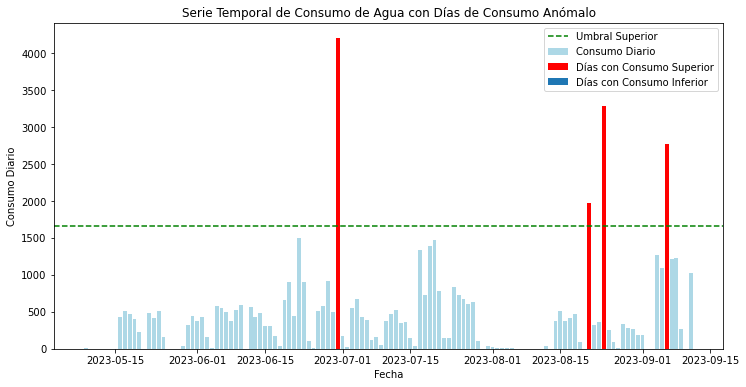

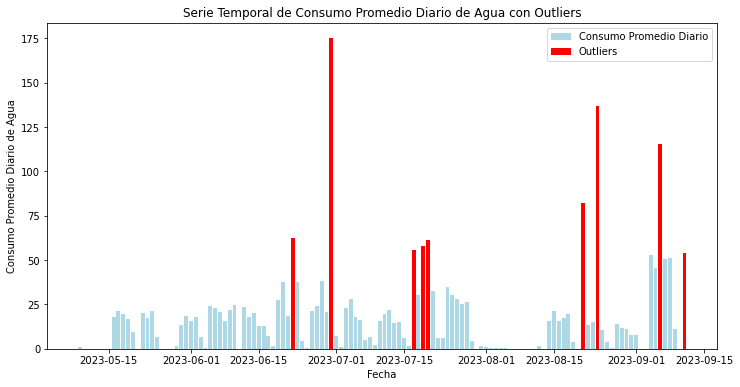

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Supongamos que tienes un DataFrame llamado 'agua' con un índice datetime y una columna 'consumo'.
# Asegúrate de que el índice sea de tipo datetime.
agua.index = pd.to_datetime(agua.index)

# Calcula el consumo promedio diario
consumo_diario_promedio = agua['consumo'].resample('D').mean()

# Calcula el rango intercuartil (IQR) de los datos
q1 = np.percentile(consumo_diario_promedio, 25)
q3 = np.percentile(consumo_diario_promedio, 75)
iqr = q3 - q1

# Calcula los límites para definir outliers
umbral_inferior = q1 - 1.5 * iqr
umbral_superior = q3 + 1.5 * iqr

# Encuentra los outliers (valores que están fuera de los límites)
outliers = consumo_diario_promedio[(consumo_diario_promedio < umbral_inferior) | (consumo_diario_promedio > umbral_superior)]

# Supongamos que tienes un DataFrame llamado 'agua' con valores diarios de consumo.
# Asegúrate de que el índice de 'agua' sea de tipo datetime.

# Crea una gráfica de barras diaria con valores promedio diarios
plt.figure(figsize=(12, 6))

# Graficar la serie temporal de consumo diario en forma de barras
plt.bar(consumo_diario_promedio.index, consumo_diario_promedio, label='Consumo Promedio Diario', color='lightblue')

# Señala los outliers en rojo
outlier_dates = outliers.index
plt.bar(outlier_dates, outliers, color='red', label='Outliers')

plt.xlabel('Fecha')
plt.ylabel('Consumo Promedio Diario de Agua')
plt.title('Serie Temporal de Consumo Promedio Diario de Agua con Outliers')
plt.legend()
plt.show()


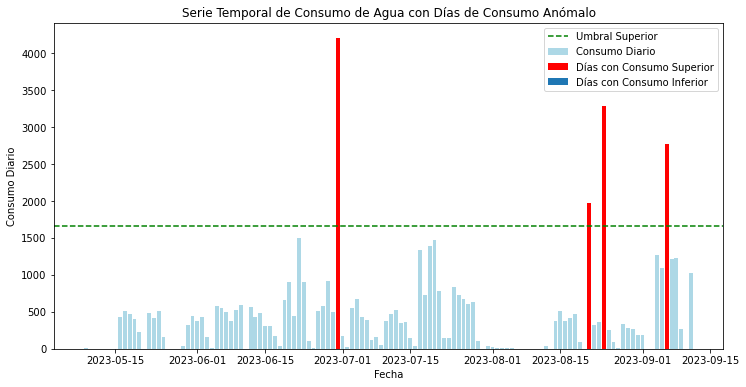

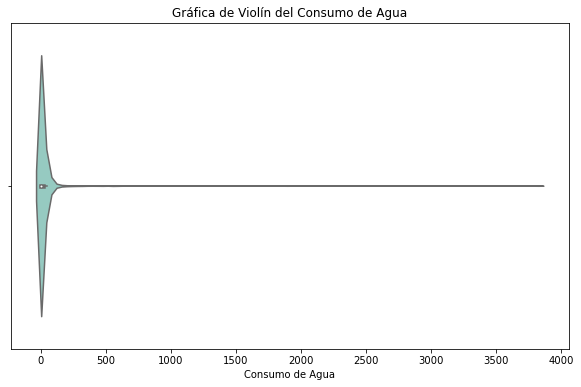

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'agua' con un índice datetime y una columna 'consumo'.
# Asegúrate de que el índice sea de tipo datetime.
agua.index = pd.to_datetime(agua.index)

# Crea una gráfica de violín del consumo de agua
plt.figure(figsize=(10, 6))
sns.violinplot(x=agua['consumo'], palette="Set3")

plt.xlabel('Consumo de Agua')
plt.title('Gráfica de Violín del Consumo de Agua')

plt.show()


<ipython-input-43-26f3f3d3233d>:14: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  sns.violinplot(x=agua_semanal.index.week, y=agua_semanal['consumo'], palette="Set3")


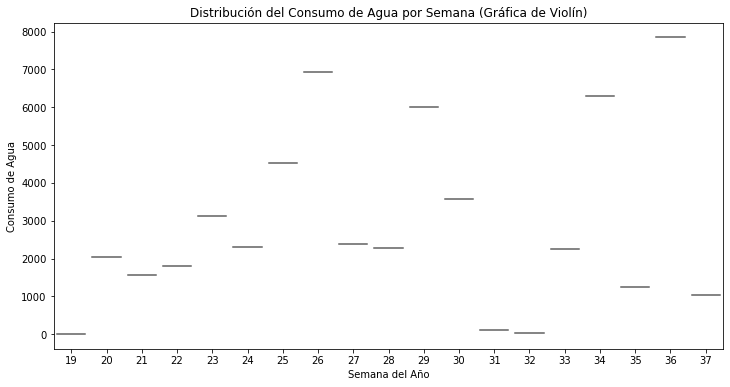

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'agua' con un índice datetime y una columna 'consumo'.
# Asegúrate de que el índice sea de tipo datetime.
agua.index = pd.to_datetime(agua.index)

# Agrupa los datos por semana
agua_semanal = agua.resample('W-SUN').sum()  # Supongamos que deseas la suma del consumo semanal

# Crea una gráfica de violín del consumo de agua por semana
plt.figure(figsize=(12, 6))
sns.violinplot(x=agua_semanal.index.week, y=agua_semanal['consumo'], palette="Set3")

plt.xlabel('Semana del Año')
plt.ylabel('Consumo de Agua')
plt.title('Distribución del Consumo de Agua por Semana (Gráfica de Violín)')

plt.show()
